In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
geo_ntl = gpd.read_file('../dataset/shapefiles/br/grid_area.shp')
geo_ntl

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,area,avg_ntl,geometry
0,1100205,Porto Velho,RO,34090.952,0.000081,NaN,"POLYGON ((-66.819 -9.820, -66.819 -9.811, -66...."
1,1100205,Porto Velho,RO,34090.952,0.000081,NaN,"POLYGON ((-66.810 -9.829, -66.810 -9.820, -66...."
2,1100205,Porto Velho,RO,34090.952,0.000081,0.222098,"POLYGON ((-66.810 -9.820, -66.810 -9.811, -66...."
3,1100205,Porto Velho,RO,34090.952,0.000081,NaN,"POLYGON ((-66.810 -9.811, -66.810 -9.802, -66...."
4,1100205,Porto Velho,RO,34090.952,0.000081,0.223136,"POLYGON ((-66.801 -9.829, -66.801 -9.820, -66...."
...,...,...,...,...,...,...,...
244909,5300108,Brasília,DF,5760.784,0.000081,NaN,"POLYGON ((-47.314 -15.753, -47.314 -15.744, -4..."
244910,5300108,Brasília,DF,5760.784,0.000081,NaN,"POLYGON ((-47.314 -15.744, -47.314 -15.735, -4..."
244911,5300108,Brasília,DF,5760.784,0.000081,NaN,"POLYGON ((-47.314 -15.717, -47.314 -15.708, -4..."
244912,5300108,Brasília,DF,5760.784,0.000081,NaN,"POLYGON ((-47.314 -15.708, -47.314 -15.699, -4..."


<AxesSubplot: >

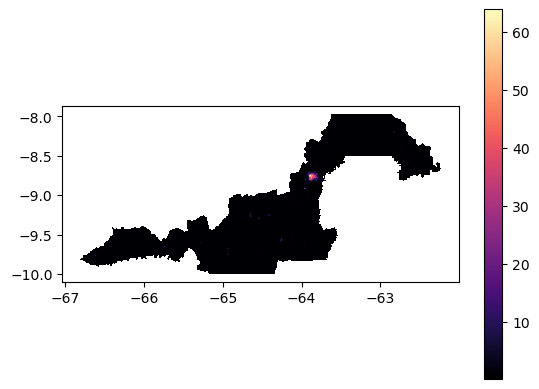

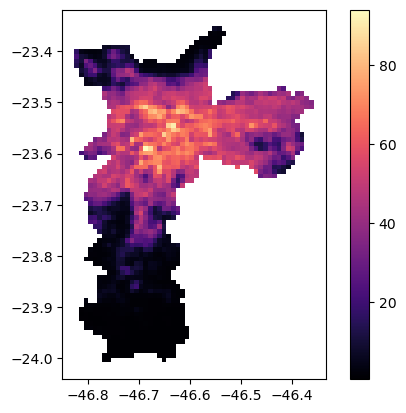

In [4]:
# EXEMPLO DE VISUALIZACAO TODOS OS PONTOS

# shapefile[shapefile['CD_MUN'] == '3205309'].plot(linewidth=0.5, color='#D3D3D3')
# geo_ntl[geo_ntl['CD_MUN'] == '1100205'].plot(linewidth=0.5, color='#D3D3D3')
geo_ntl[geo_ntl['CD_MUN'] == '1100205'].plot(column='avg_ntl', cmap='magma', legend=True)
geo_ntl[geo_ntl['CD_MUN'] == '3550308'].plot(column='avg_ntl', cmap='magma', legend=True)


<AxesSubplot: >

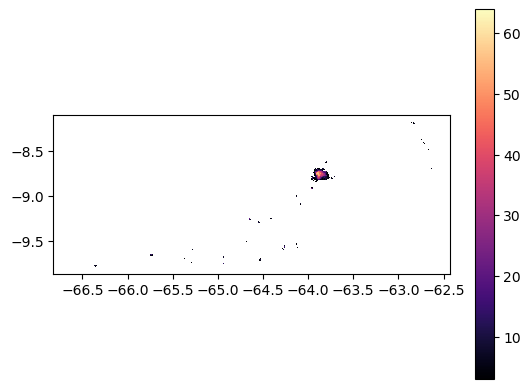

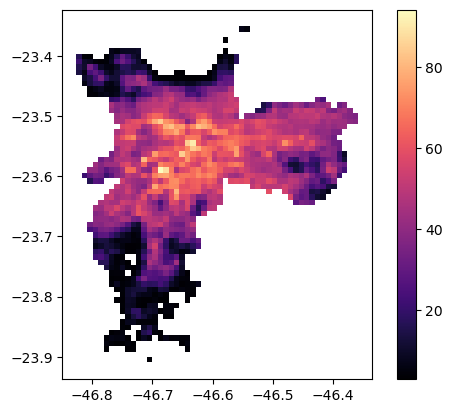

In [5]:
# EXEMPLO DE VISUALIZACAO PONTOS FILTRADOS

geo_ntl[(geo_ntl['CD_MUN'] == '1100205') & (geo_ntl['avg_ntl'] > 3)].plot(column='avg_ntl', cmap='magma', legend=True)
geo_ntl[(geo_ntl['CD_MUN'] == '3550308') & (geo_ntl['avg_ntl'] > 3)].plot(column='avg_ntl', cmap='magma', legend=True)

In [6]:
# remover pontos de componentes com baixa intensidade de luz
geo_ntl_filtered = geo_ntl[geo_ntl['avg_ntl'] > 3]
geo_ntl_filtered.groupby(by=['NM_MUN', 'CD_MUN']).count().sort_values("avg_ntl")

,,SIGLA,AREA_KM2,area,avg_ntl,geometry
NM_MUN,CD_MUN,,,,,
Santo André,2513851,1,1,1,1,1
Santa Maria,2409332,2,2,2,2,2
Várzea Grande,2211407,3,3,3,3,3
Campo Grande,2401305,3,3,3,3,3
São Vicente,2413003,4,4,4,4,4
...,...,...,...,...,...,...
Goiânia,5208707,573,573,573,573,573
Campinas,3509502,641,641,641,641,641
Rio de Janeiro,3304557,1304,1304,1304,1304,1304


In [13]:
# filtrar cidades acima de 50 grids
geo_ntl_filtered = geo_ntl_filtered.groupby(['CD_MUN']).filter(lambda x: len(x) >= 50)
count = geo_ntl_filtered.groupby(by=['NM_MUN', 'CD_MUN']).count()
count.sort_values(by='avg_ntl')


,,SIGLA,AREA_KM2,area,avg_ntl,geometry
NM_MUN,CD_MUN,,,,,
Olinda,2609600,54,54,54,54,54
Mauá,3529401,86,86,86,86,86
Osasco,3534401,86,86,86,86,86
Embu das Artes,3515004,87,87,87,87,87
Barueri,3505708,89,89,89,89,89
...,...,...,...,...,...,...
Goiânia,5208707,573,573,573,573,573
Campinas,3509502,641,641,641,641,641
Rio de Janeiro,3304557,1304,1304,1304,1304,1304


In [14]:
geo_ntl_filtered.to_file('../dataset/shapefiles/br/grid_area_filtered.shp')